In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [3]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('Data/final_data.csv')

In [4]:
# go to delete duplicates columns
df.drop(columns=['position_encoded', 'player', 'name'], inplace=True)

In [5]:
#Display number missing values per column
df.isnull().sum().sort_values(ascending=False)

team                   0
goals conceded         0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
red cards              0
position               0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
winger                 0
dtype: int64

In [6]:
# check columns types 
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

In [7]:
convert_per90 = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets']
for n in convert_per90:
    df[n] = (df[n]) * (df['minutes played'] / 90)

In [8]:
df.head(10)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,1.0,0.0,0.0,127.0,35.0,9390,42,5,13,15000000,70000000,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,1.0,0.0,0.0,18.0,3.0,1304,510,58,1,1500000,22000000,0
2,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.0,0.0,0.0,2.0,3.0,292,697,84,4,600000,6000000,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,2.0,4.0,16.0,0.0,0.0,0.0,0.0,6408,175,22,9,50000000,50000000,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,1.0,1.0,3.0,0.0,0.0,0.0,0.0,5031,238,51,21,40000000,80000000,0
5,Manchester United,Defender Centre-Back,194.0,30.0,68,2.0,0.0,16.0,1.0,0.0,0.0,0.0,4762,148,27,1,25000000,70000000,0
6,Manchester United,Defender Centre-Back,187.0,28.0,70,0.0,2.0,7.0,0.0,0.0,0.0,0.0,5471,95,19,10,15000000,35000000,0
7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,416,932,169,7,2000000,20000000,0
8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2758,47,13,0,2000000,2000000,0
9,Manchester United,Defender Left-Back,178.0,27.0,74,1.0,11.0,23.0,0.0,0.0,0.0,0.0,5854,443,70,4,35000000,42000000,1


### Dealing with outliers:

In [9]:
outliers = ['current_value', 'highest_value']
for n in outliers:
    q25, q75 = np.nanpercentile(df[n], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    print(f'{n} : Q1={q25}, Q3={q75}, IQR={iqr} | lower bound={lower_bound}, upper bound={upper_bound} min={df[n].min()} max={df[n].max()}')


current_value : Q1=300000.0, Q3=3000000.0, IQR=2700000.0 | lower bound=-3750000.0, upper bound=7050000.0 min=0 max=180000000
highest_value : Q1=450000.0, Q3=5000000.0, IQR=4550000.0 | lower bound=-6375000.0, upper bound=11825000.0 min=0 max=200000000


In [10]:
df_outliers = df[df['current_value'] > 7050000.0]

In [11]:
df_outliers = df[df['highest_value'] > 11825000.0]

In [12]:
df_all = df.copy()

In [13]:
df = df[df['current_value'] <= 7050000.0]

In [14]:
df = df[df['highest_value'] <= 11825000.0]

In [15]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

In [16]:
df_all.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000
mean,181.240353,26.041903,36.407011,3.716013,2.649061,4.824344,0.122187,0.142924,3.571973,0.812907,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,0.307513
std,6.969818,4.777629,26.526541,6.575578,4.137904,4.954899,0.370673,0.408380,14.683058,3.597683,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,0.000000
50%,181.240353,26.000000,35.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,0.000000
75%,186.000000,29.000000,59.000000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,1.000000
max,206.000000,43.000000,107.000000,83.000000,45.000000,35.000000,4.000000,4.000000,155.000000,46.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,1.000000


**numerical & numerical --> (Scatter plot, line chart)**

## Feature Engineering

In [17]:
categorical_features = ['team','position']
numeric_features = [n for n in list(df.select_dtypes(include=np.number)) if n not in categorical_features]
numeric_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'winger']

In [18]:
df2 = pd.get_dummies(df_all, columns=categorical_features)

In [19]:
corr = df2.select_dtypes(include=np.number).corr()

In [20]:
df2.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'position_Defender Centre-Back', 'position_Defender Left-Back',
       'position_Defender Right-Back', 'position_Goalkeeper',
       'position_midfield', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'position_midfield-LeftMidfield',
       'position_midfield-RightMidfield'],
      dtype='object', length=407)

In [21]:
p35 = df2['current_value'].quantile(0.35)
p75 = df2['current_value'].quantile(0.75)

def categorize_value(value):
    if value < p35:
        return 'Star'
    elif value < p75:
        return 'Superstar'
    else:
        return 'MidStar'

df2['current_value_category'] = df2['current_value'].apply(categorize_value)
df2.drop('current_value', axis=1, inplace=True)

print(df2['current_value_category'].value_counts())

current_value_category
Superstar    4310
Star         3754
MidStar      2690
Name: count, dtype: int64


In [22]:
encoder = LabelEncoder()
df2['current_value_category'] = encoder.fit_transform(df2['current_value_category'])

In [23]:
correlation = df2.corr()
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category          1.000000
age                             0.106704
team_Mamelodi Sundowns FC       0.042064
team_Fortaleza Esporte Clube    0.041108
team_Fortuna Sittard            0.040810
                                  ...   
goals                          -0.197427
assists                        -0.224802
minutes played                 -0.238808
appearance                     -0.243714
highest_value                  -0.413106
Name: current_value_category, Length: 407, dtype: float64


In [24]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = list(correlation[abs(correlation['current_value_category']) > threshold]['current_value_category'].index)
selected_features

['appearance',
 'assists',
 'minutes played',
 'highest_value',
 'current_value_category']

# Prepare test and train

In [25]:
# Prepare data
X = df2.drop(['current_value_category'], axis=1)
y = df2['current_value_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=43)
#random_state=2

## Building Model

In [36]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [37]:
param_grid = {
    'max_depth': [35, 38, 40, 42, 45],
    'n_estimators': [10,20,30,40,50]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=1)

## Train Model

In [28]:
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [38]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [35, 38, 40, 42, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='f1_macro', verbose=1)

In [40]:
grid_search.best_params_

{'max_depth': 42, 'n_estimators': 50}

In [32]:
best_model = grid_search.best_estimator_

## Test Model

In [33]:
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

## Intrepetatin of the model

## Evaluating

1. Accuracy
2. Precision
3. Confusion
4. Recall
5. F1 Score


In [34]:
# Benchmark
base_model = round(df2['current_value_category'].value_counts()[1]/df2.shape[0]*100, 2)
base_model

34.91

Model: Decision Tree
Accuracy: 0.8354253835425384
precision: 0.838504015138701
recall: 0.8410806112491099
F1 Score: 0.84
Confusion Matrix:


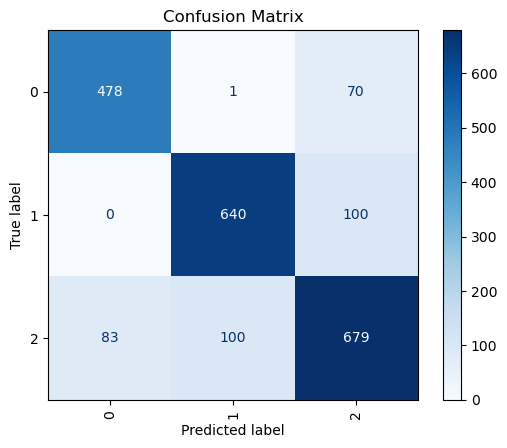


Model: Random Forest
Accuracy: 0.8414690841469085
precision: 0.8638567108899621
recall: 0.8350761891174959
F1 Score: 0.84
Confusion Matrix:


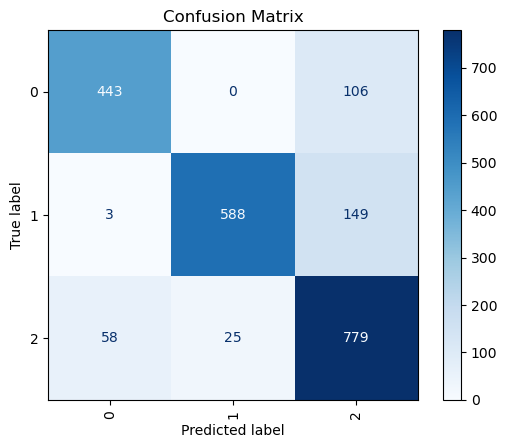


Model: Grid Search
Accuracy: 0.8498372849837285
precision: 0.8715004654864197
recall: 0.8438987787757329
F1 Score: 0.85
Confusion Matrix:


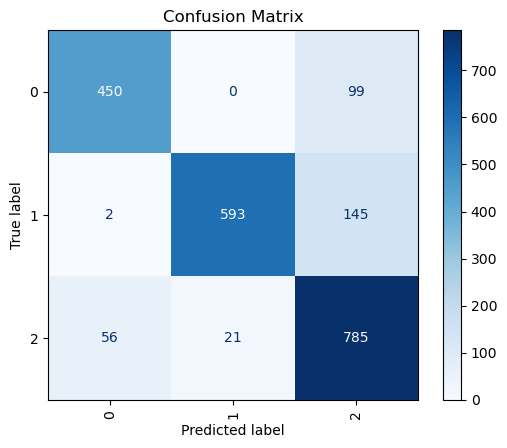

In [35]:
# Accuracy
from sklearn.metrics import ConfusionMatrixDisplay
for model_name, y_pred, classes in zip(['Decision Tree', 'Random Forest', 'Grid Search'],
                        [y_pred_dt, y_pred_rf, y_pred_rf_g],
                        [dt_classifier, rf_classifier, grid_search]

                        ):

    print(f'Model: {model_name}')
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                            display_labels=classes.classes_,
                                            cmap='Blues',
                                            xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.show()
    print()
